# **Univariate Regression**

Mean Squared Error: 0.6309106198842369


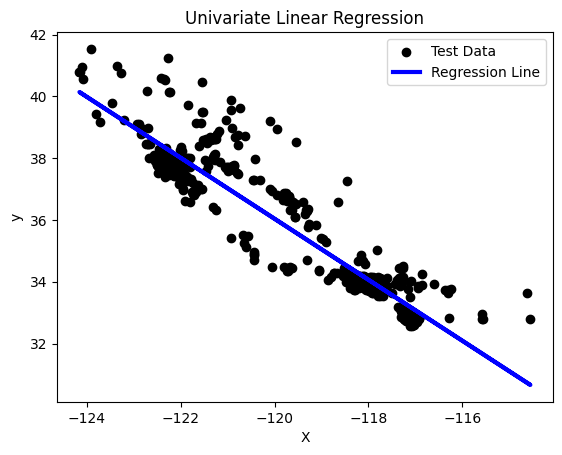

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('/content/sample_data/california_housing_test.csv')
X = data['longitude'].values
y = data['latitude'].values

# Split the data into training and testing sets
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    indices = np.arange(len(X))
    np.random.shuffle(indices)

    test_size = int(len(X) * test_size)

    X_train, X_test = X[indices[:-test_size]], X[indices[-test_size:]]
    y_train, y_test = y[indices[:-test_size]], y[indices[-test_size:]]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

# Implement Linear Regression
def fit_linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)

    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
    b = y_mean - m * X_mean

    return m, b

def predict(m, b, X):
    return m * X + b

# Train the model
m, b = fit_linear_regression(X_train, y_train)

# Make predictions
predictions = predict(m, b, X_test)

# Calculate Mean Squared Error
mse = np.mean((y_test - predictions) ** 2)
print(f"Mean Squared Error: {mse}")

# Plot the regression line
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.plot(X_test, predictions, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Univariate Linear Regression')
plt.show()


# **Multivariate Regression**

Mean Squared Logarithmic Error (MSLE): 0.00134503779210452
R-squared (Coefficient of Determination): 0.13857008397710702
Intercept (b0): 35.53900330639034
Coefficients (b1, b2): [-0.03183936  0.00085291]


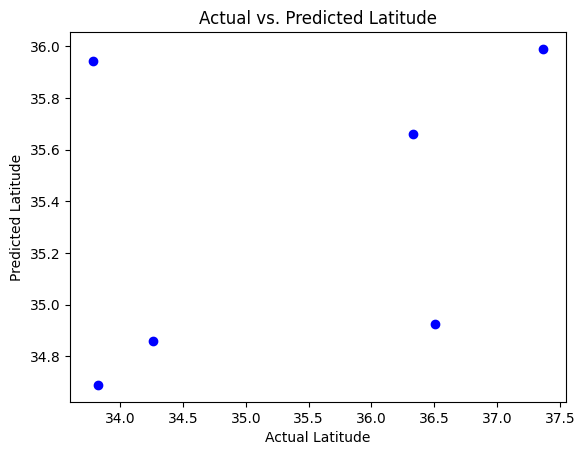

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Select multiple independent variables and the dependent variable
X = data.loc[0:5, ["housing_median_age", "population"]].values
y = data.loc[0:5, "latitude"].values

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Define the multivariate linear regression functions
def fit_multivariate_linear_regression(X, y):
    # Calculate coefficients using the normal equation
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients

def predict(X, coefficients):
    return X @ coefficients

# Train the model
coefficients = fit_multivariate_linear_regression(X, y)

# Make predictions
y_pred = predict(X, coefficients)

# Calculate Mean Squared Logarithmic Error (MSLE) and R-squared
mse = np.mean((np.log1p(y) - np.log1p(y_pred)) ** 2)
r_squared = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

print("Mean Squared Logarithmic Error (MSLE):", mse)
print("R-squared (Coefficient of Determination):", r_squared)

# Print model coefficients
print("Intercept (b0):", coefficients[0])
print("Coefficients (b1, b2):", coefficients[1:])

# Plot the actual vs. predicted values
plt.scatter(y, y_pred, color='blue')
plt.xlabel("Actual Latitude")
plt.ylabel("Predicted Latitude")
plt.title("Actual vs. Predicted Latitude")
plt.show()


# **Polynomial Regression**

Mean Squared Logarithmic Error (MSLE): 0.0014701074846341707
R-squared (Coefficient of Determination): 0.056311444286426204
Intercept (b0): 38.241571844059436
Coefficients (b1, b2, ...): [-0.15244443  0.00175451]


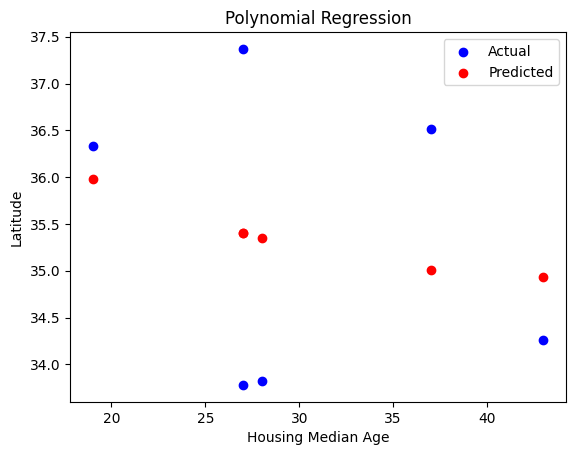

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Select an independent variable and the dependent variable
X = data.loc[0:5, ["housing_median_age"]].values
y = data.loc[0:5, "latitude"].values

# Create polynomial features
degree = 2
X_poly = np.c_[np.ones(X.shape[0]), X]
for d in range(2, degree + 1):
    X_poly = np.c_[X_poly, X ** d]

# Define the multivariate linear regression functions
def fit_multivariate_linear_regression(X, y):
    # Calculate coefficients using the normal equation
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients

def predict(X, coefficients):
    return X @ coefficients

# Train the model
coefficients = fit_multivariate_linear_regression(X_poly, y)

# Make predictions
y_pred = predict(X_poly, coefficients)

# Calculate Mean Squared Logarithmic Error (MSLE) and R-squared
mse = np.mean((np.log1p(y) - np.log1p(y_pred)) ** 2)
r_squared = 1 - (np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2))

print("Mean Squared Logarithmic Error (MSLE):", mse)
print("R-squared (Coefficient of Determination):", r_squared)

# Print model coefficients
print("Intercept (b0):", coefficients[0])
print("Coefficients (b1, b2, ...):", coefficients[1:])

# Create a scatter plot of actual vs. predicted values
plt.scatter(X, y, color='blue', label='Actual')
plt.scatter(X, y_pred, color='red', label='Predicted')
plt.xlabel("Housing Median Age")
plt.ylabel("Latitude")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
